In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, fbeta_score, make_scorer
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import  cross_validate, StratifiedShuffleSplit
from sklearn import tree
import graphviz

# Project files

In [3]:
sys.path.append('./drive/MyDrive/TFG/implementations/machine_learning_tfg/')
from src.utils.model_metrics_generator import ModelMetricsGenerator
from src.utils.cross_validation_utils import CrossValidationMetricsResultPrinter
from src.utils.my_metrics import accuracy_precision_recall_specifity_f2_score
metrics = accuracy_precision_recall_specifity_f2_score()

# Functions

In [4]:
def plot_metrics(metrics, model_description):
    history_df = pd.DataFrame(metrics)
    history_df.loc[:, ['test_accuracy', 'test_recall']].plot()
    plt.title(f'Métricas obtenidas por el modelo {model_description}.')
    plt.ylabel('Valor')
    plt.xlabel('iteraciones')
    plt.legend(title='', labels=['Precisión', 'Exhaustividad'])

# Load data

In [5]:
input_data = pd.read_excel('/content/drive/MyDrive/TFG/implementations/machine_learning_tfg/data/prepared/prepared_ICU_Prediction.xlsx')
#input_data = pd.read_excel('./../data/prepared/prepared_ICU_Prediction.xlsx')
ground_truth = input_data['ICU']
sample_data = input_data.drop('ICU', axis=1)
train_data, test_data, train_truth, test_truth = train_test_split(sample_data, ground_truth, test_size=0.2, shuffle=True)

# Decision Tree models

In [ ]:
gini_model = tree.DecisionTreeClassifier(random_state=0)

model_metrics_generator = ModelMetricsGenerator(test_data, test_truth)
gini_model = model_metrics_generator.generate_metrics(gini_model, train_data, train_truth)
model_metrics_generator.print_results()


Fit time: 0.1196s.
Predict time: 0.0019s.
Accuracy: 87.27%.
Precision: 81.71%.
Recall: 77.01%.
Specificity: 92.02%.
F2-score: 77.91%.


In [ ]:

class_names = {0:'No UCI', 1:'UCI'}
dot_data = tree.export_graphviz(gini_model,
                     feature_names=sample_data.columns,  
                     class_names=class_names,   
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("UCI_Decision_tree") 

'UCI_Decision_tree.pdf'

In [ ]:
entropy_model = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)

model_metrics_generator = ModelMetricsGenerator(test_data, test_truth)
entropy_model = model_metrics_generator.generate_metrics(entropy_model, train_data, train_truth)
model_metrics_generator.print_results()


Fit time: 0.124s.
Predict time: 0.0017s.
Accuracy: 86.55%.
Precision: 79.76%.
Recall: 77.01%.
Specificity: 90.96%.
F2-score: 77.55%.


## Stratified cross validation


Valores medios:
	Fit time: 0.1665s.
	Test time: 0.0074s
	Accuracy: 89.86%.
	Precision: 85.65%.
	Recall: 84.13%.
	Specificity: 92.72%.
	F2 score: 84.32%.


0.1665
0.0074
89.86
85.65
84.13
92.72
84.32


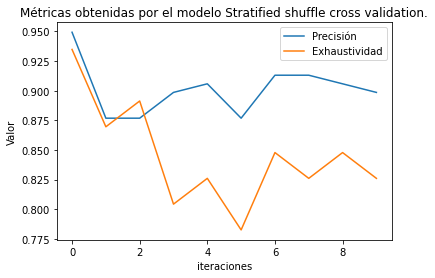

In [ ]:
sscv_model = tree.DecisionTreeClassifier()
sskfold = StratifiedShuffleSplit(n_splits=10, random_state=1)
sscv_results = cross_validate(sscv_model, sample_data, ground_truth, cv=sskfold, scoring=metrics, n_jobs=-1)

printer = CrossValidationMetricsResultPrinter()
printer.print_metrics_report(sscv_results)

plot_metrics(scv_results, 'Stratified shuffle cross validation')


Valores medios:
	Fit time: 0.1678s.
	Test time: 0.0075s
	Accuracy: 87.39%.
	Precision: 83.92%.
	Recall: 76.96%.
	Specificity: 92.61%.
	F2 score: 78.17%.


0.1678
0.0075
87.39
83.92
76.96
92.61
78.17


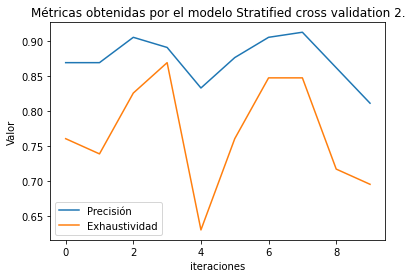

In [ ]:
sskfold2 = StratifiedShuffleSplit(n_splits=10, random_state=1)
sscv_model2 = tree.DecisionTreeClassifier(class_weight={0:1, 1:10})
sscv_results2 = cross_validate(sscv_model2, sample_data, ground_truth, cv=sskfold2, scoring=metrics, n_jobs=-1)

printer = CrossValidationMetricsResultPrinter()
printer.print_metrics_report(scv_results2)

plot_metrics(sscv_results2, 'Stratified shuffle cross validation 2')


Valores medios:
	Fit time: 0.1364s.
	Test time: 0.0078s
	Accuracy: 88.7%.
	Precision: 86.14%.
	Recall: 78.91%.
	Specificity: 93.59%.
	F2 score: 80.21%.


0.1364
0.0078
88.7
86.14
78.91
93.59
80.21


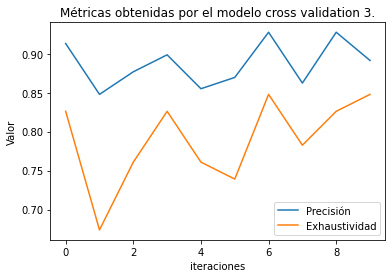

In [ ]:
sskfold3 = StratifiedShuffleSplit(n_splits=10, random_state=1)
sscv_model3 = tree.DecisionTreeClassifier(class_weight={0:1, 1:3})
sscv_results3 = cross_validate(sscv_model3, sample_data, ground_truth, cv=sskfold3, scoring=metrics, n_jobs=-1)

printer = CrossValidationMetricsResultPrinter()
printer.print_metrics_report(sscv_results3)
plot_metrics(sscv_results3, 'Stratified shuffle cross validation 3')